## Importing the data and necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
import xgboost as xgb

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df.shape

(165034, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
## checking for missing values
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
## checking for duplicate values
df.duplicated().sum()

0

In [8]:
# dropping irrelevant columns
df.drop(columns=['id','CustomerId','Surname'],inplace=True)

## Basic Understanding of the data

<Axes: ylabel='CreditScore'>

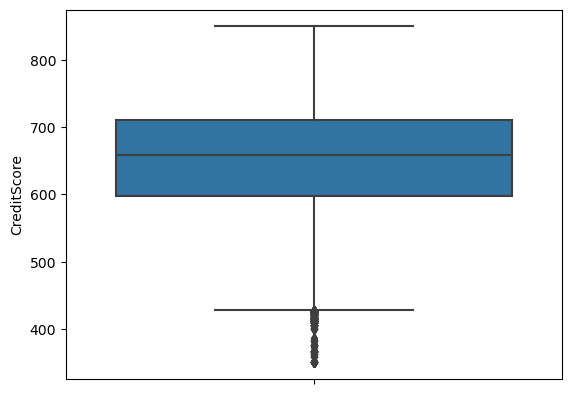

In [9]:
sns.boxplot(df,y='CreditScore')

In [10]:
df['Geography'].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()


Gender
Male      93150
Female    71884
Name: count, dtype: int64

<Axes: ylabel='Age'>

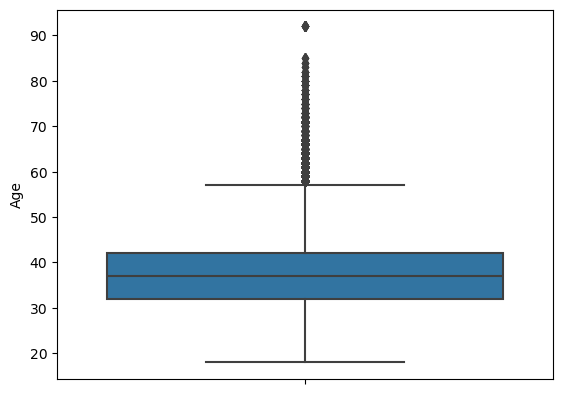

In [12]:
sns.boxplot(df,y='Age')


<Axes: ylabel='Tenure'>

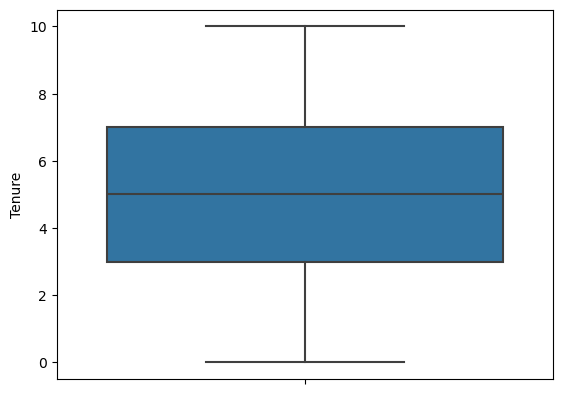

In [13]:
sns.boxplot(df,y='Tenure')


<Axes: ylabel='Balance'>

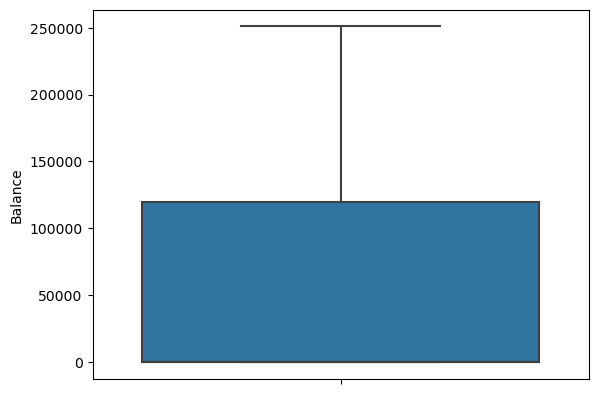

In [14]:
sns.boxplot(df,y='Balance')


In [15]:
df['NumOfProducts'].value_counts()

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

In [16]:
df['HasCrCard'].value_counts()

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

In [17]:
df['IsActiveMember'].value_counts()

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

<Axes: ylabel='EstimatedSalary'>

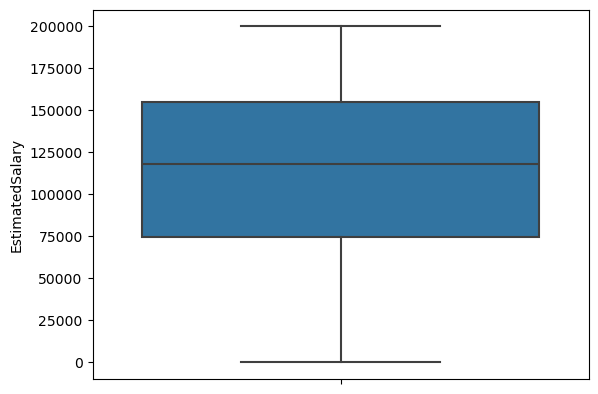

In [18]:
sns.boxplot(df,y='EstimatedSalary')


In [19]:
df['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [20]:
df[['Age','CreditScore']].describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Age,165034.0,38.125888,8.867205,18.0,22.0,23.0,24.0,25.0,26.0,28.0,32.0,37.0,42.0,50.0,56.0,57.0,59.0,62.0,66.0,92.0
CreditScore,165034.0,656.454373,80.103340,350.0,468.0,487.0,503.0,516.0,524.0,554.0,597.0,659.0,710.0,754.0,787.0,800.0,814.0,836.0,850.0,850.0


In [200]:
# cliping the columns to handle outliers

In [21]:
df['Age']=df['Age'].clip(upper=df['Age'].quantile(.99))

In [22]:
df['CreditScore']=df['CreditScore'].clip(lower=df['CreditScore'].quantile(.01))


<Axes: ylabel='Age'>

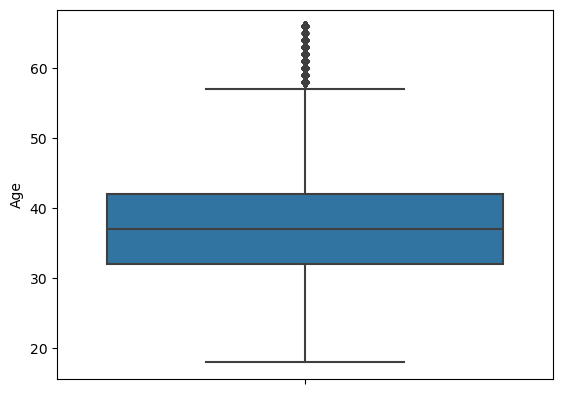

In [23]:
sns.boxplot(df,y='Age')


<Axes: ylabel='CreditScore'>

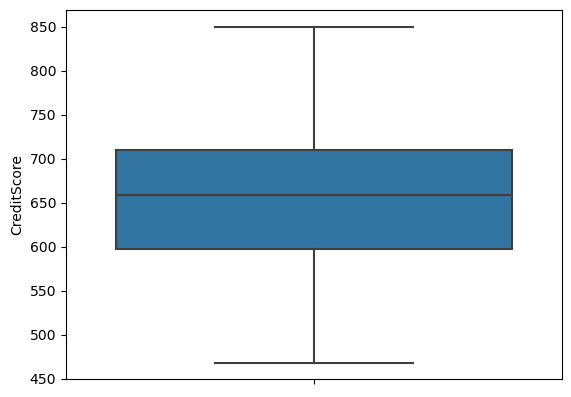

In [24]:
sns.boxplot(df,y='CreditScore')


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [ ]:
## standardizing the data

In [26]:
columns_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

In [27]:
sc = StandardScaler()

df[columns_to_scale] = sc.fit_transform(df[columns_to_scale])

In [28]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.142210,France,Male,-0.583411,-0.719973,-0.883163,2,1.0,0.0,1.369486,0
1,-0.373809,France,Male,-0.583411,-1.432694,-0.883163,2,1.0,1.0,-1.254085,0
2,0.268069,France,Male,0.219915,1.774548,-0.883163,2,1.0,0.0,1.437422,0
3,-0.952758,France,Male,-0.468650,-1.076334,1.486918,1,1.0,1.0,-0.557018,0
4,0.746331,Spain,Male,-0.583411,-0.007253,-0.883163,2,1.0,1.0,-1.938770,0


In [29]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
CreditScore,165034.0,2.645258e-16,1.000003,-2.374958,-2.374958,-2.135827,-1.934454,-1.770838,-1.670151,-1.292576,-0.751384,0.028938,0.670816,1.224593,1.639925,1.803541,1.979743,2.256631,2.432833,2.432833
Age,165034.0,2.664955e-16,1.000003,-2.304823,-1.845779,-1.731019,-1.616258,-1.501497,-1.386736,-1.157215,-0.698171,-0.124367,0.449437,1.367523,2.056088,2.170849,2.400371,2.744653,3.203696,3.203696
Tenure,165034.0,-4.680005e-17,1.000003,-1.789054,-1.789054,-1.789054,-1.789054,-1.432694,-1.432694,-1.432694,-0.719973,-0.007253,0.705467,1.418187,1.418187,1.418187,1.774548,1.774548,1.774548,1.774548
Balance,165034.0,-3.349626e-17,1.000003,-0.883163,-0.883163,-0.883163,-0.883163,-0.883163,-0.883163,-0.883163,-0.883163,-0.883163,1.026170,1.344864,1.531317,1.567952,1.642147,1.741941,1.860113,3.110918
NumOfProducts,165034.0,1.554455e+00,0.547154,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000
HasCrCard,165034.0,7.539537e-01,0.430707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
IsActiveMember,165034.0,4.977702e-01,0.499997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
EstimatedSalary,165034.0,-3.231873e-16,1.000003,-2.238162,-2.204320,-2.119413,-2.038004,-1.924313,-1.816892,-1.344318,-0.754329,0.106838,0.846597,1.277893,1.410054,1.438816,1.495250,1.548519,1.663494,1.738177
Exited,165034.0,2.115988e-01,0.408443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
## encoding the categorical features

In [30]:
columns_to_encode = ['Geography','Gender','NumOfProducts']

In [31]:
df1 = pd.get_dummies(df,columns=columns_to_encode,dtype='int')

In [32]:
df1.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.142210,-0.583411,-0.719973,-0.883163,1.0,0.0,1.369486,0,1,0,0,0,1,0,1,0,0
1,-0.373809,-0.583411,-1.432694,-0.883163,1.0,1.0,-1.254085,0,1,0,0,0,1,0,1,0,0
2,0.268069,0.219915,1.774548,-0.883163,1.0,0.0,1.437422,0,1,0,0,0,1,0,1,0,0
3,-0.952758,-0.468650,-1.076334,1.486918,1.0,1.0,-0.557018,0,1,0,0,0,1,1,0,0,0
4,0.746331,-0.583411,-0.007253,-0.883163,1.0,1.0,-1.938770,0,0,0,1,0,1,0,1,0,0


In [ ]:
## separating the dependent and independent variables

In [185]:
x  = df1.drop(columns='Exited')
y = df1['Exited']

In [34]:
## splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=y)

In [35]:
## handling the imbalanced data
from imblearn.over_sampling import ADASYN #SMOTE   
os=ADASYN(sampling_strategy=0.8)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

In [36]:
y_train.value_counts()

Exited
0    97584
1    26191
Name: count, dtype: int64

In [37]:
y_train_ns.value_counts()


Exited
0    97584
1    76427
Name: count, dtype: int64

## Logistic Regression

In [38]:
lr = LogisticRegression(max_iter=500)
lr.fit(x_train_ns,y_train_ns)

LogisticRegression(max_iter=500)

In [39]:
print('train accuracy: ',lr.score(x_train,y_train))
print('test accuracy: ',lr.score(x_test,y_test))


train accuracy:  0.7983437689355686
test accuracy:  0.7968685620107128


In [40]:
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

In [41]:
print('classification report on train data \n',metrics.classification_report(y_train,pred_train))

classification report on train data 
               precision    recall  f1-score   support

           0       0.93      0.80      0.86     97584
           1       0.52      0.79      0.62     26191

    accuracy                           0.80    123775
   macro avg       0.72      0.79      0.74    123775
weighted avg       0.84      0.80      0.81    123775



In [42]:
print('classification report on test data \n',metrics.classification_report(y_test,pred_test))


classification report on test data 
               precision    recall  f1-score   support

           0       0.93      0.80      0.86     32529
           1       0.51      0.77      0.62      8730

    accuracy                           0.80     41259
   macro avg       0.72      0.79      0.74     41259
weighted avg       0.84      0.80      0.81     41259



In [43]:
prob_train_1=lr.predict_proba(x_train)[:,1]  #Prob of 1 
prob_test_1=lr.predict_proba(x_test)[:,1]

In [44]:
## creating a function to evaluate model performance
def classification_eva(act, pred, probs):
    ac1=metrics.accuracy_score(act, pred)
    rc1=metrics.recall_score(act, pred)
    pc1=metrics.precision_score(act, pred)
    f1=metrics.f1_score(act, pred)
    auc1=metrics.roc_auc_score(act, pred)
    result={"Accuracy":ac1, "Recall":rc1, "Precision":pc1, "F1 score":f1, "AUC":auc1}
    fpr, tpr, threshold=metrics.roc_curve(act,probs )
    plt.plot([0,1],[0,1],'k--', label="AUC: "+str(auc1))
    plt.plot(fpr,tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.legend()
    plt.show()
    return result

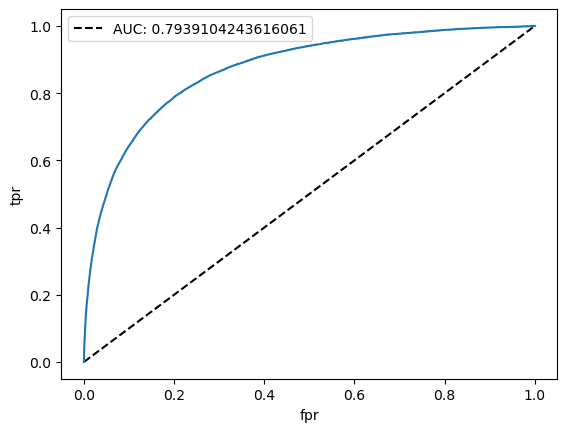

{'Accuracy': 0.7983437689355686,
 'Recall': 0.7862242755144897,
 'Precision': 0.5154056015818587,
 'F1 score': 0.6226415094339622,
 'AUC': 0.7939104243616061}

In [45]:
classification_eva(y_train, pred_train, probs=prob_train_1)

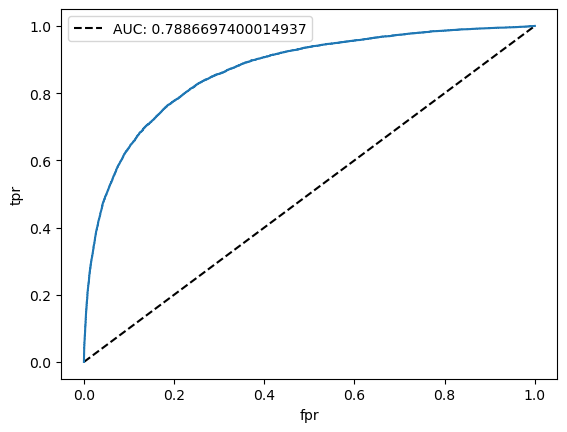

{'Accuracy': 0.7968685620107128,
 'Recall': 0.7744558991981673,
 'Precision': 0.513246792682001,
 'F1 score': 0.617358352737068,
 'AUC': 0.7886697400014937}

In [46]:
classification_eva(y_test, pred_test, probs=prob_test_1)

## Decision Tree

In [47]:
dt = DecisionTreeClassifier()

dt.fit(x_train_ns,y_train_ns)

DecisionTreeClassifier()

In [48]:
print('train accuracy: ',dt.score(x_train,y_train))
print('test accuracy: ',dt.score(x_test,y_test))


train accuracy:  0.9997737830741265
test accuracy:  0.7872948932354153


In [122]:
## hyperparameter tuning
params={
    "criterion":["gini", "entropy"],
"max_depth": [17,20,22,24,27,30,32],
"min_samples_split" :[20,50,100,200],
"min_samples_leaf" : [1,3,5,10,15,20,50]}

In [123]:
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=0),param_distributions=params,cv=10,n_jobs=2)
rs_dt.fit(x_train_ns,y_train_ns)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [17, 20, 22, 24, 27, 30,
                                                      32],
                                        'min_samples_leaf': [1, 3, 5, 10, 15,
                                                             20, 50],
                                        'min_samples_split': [20, 50, 100,
                                                              200]})

In [124]:
rs_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=5,
                       min_samples_split=100, random_state=0)

In [125]:
print('train accuracy: ',rs_dt.score(x_train,y_train))
print('test accuracy: ',rs_dt.score(x_test,y_test))


train accuracy:  0.8659341547162189
test accuracy:  0.8411013354662014


In [126]:
pred_train = rs_dt.predict(x_train)
pred_test = rs_dt.predict(x_test)

In [127]:
print('classification report on train data \n',metrics.classification_report(y_train,pred_train))

classification report on train data 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92     97584
           1       0.69      0.66      0.68     26191

    accuracy                           0.87    123775
   macro avg       0.80      0.79      0.80    123775
weighted avg       0.86      0.87      0.86    123775



In [128]:
print('classification report on test data \n',metrics.classification_report(y_test,pred_test))

classification report on test data 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     32529
           1       0.63      0.59      0.61      8730

    accuracy                           0.84     41259
   macro avg       0.76      0.75      0.76     41259
weighted avg       0.84      0.84      0.84     41259



In [129]:
prob_train_1=rs_dt.predict_proba(x_train)[:,1]  #Prob of 1 
prob_test_1=rs_dt.predict_proba(x_test)[:,1]

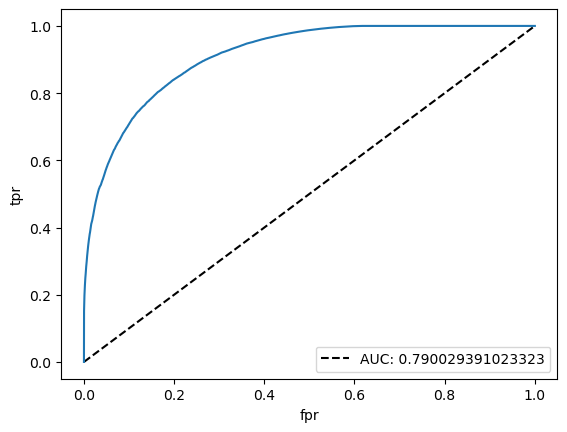

{'Accuracy': 0.8659341547162189,
 'Recall': 0.6584322858997366,
 'Precision': 0.6927650343470052,
 'F1 score': 0.6751624774880589,
 'AUC': 0.790029391023323}

In [130]:
classification_eva(y_train, pred_train, probs=prob_train_1)

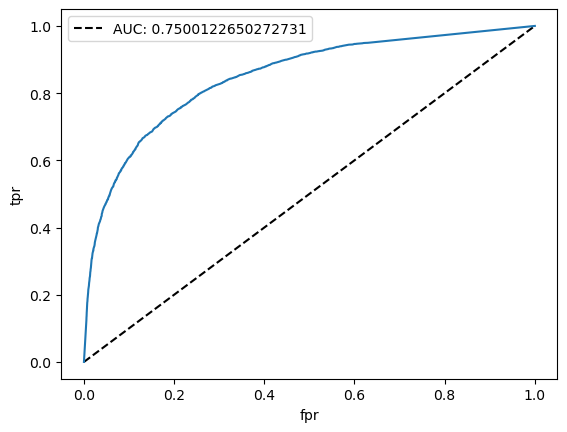

{'Accuracy': 0.8411013354662014,
 'Recall': 0.5920962199312715,
 'Precision': 0.6331455169034786,
 'F1 score': 0.6119332307328045,
 'AUC': 0.7500122650272731}

In [131]:
classification_eva(y_test, pred_test, probs=prob_test_1)


## Random Forest

In [59]:
rf = RandomForestClassifier()

rf.fit(x_train_ns,y_train_ns)

RandomForestClassifier()

In [60]:
print('train accuracy: ',rf.score(x_train,y_train))
print('test accuracy: ',rf.score(x_test,y_test))


train accuracy:  0.9997737830741265
test accuracy:  0.8445187716619404


In [132]:
parameters={"criterion":['gini', 'entropy'],
           "max_depth":[9,11,13,15,17],
           "min_samples_split":[2,5,8,10,15,20],
           "min_samples_leaf":[1,2,5,8,10],
           "n_estimators":[50,100,150,200,300],
           "bootstrap":[True],
           "max_features":["sqrt","log2"],
           "max_samples":[.5,.6,.75,.8,.9]}

In [133]:
rs_rf = RandomizedSearchCV(rf,param_distributions=parameters,cv=5,n_jobs=4)
rs_rf.fit(x_train_ns,y_train_ns)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [9, 11, 13, 15, 17],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_samples': [0.5, 0.6, 0.75, 0.8,
                                                        0.9],
                                        'min_samples_leaf': [1, 2, 5, 8, 10],
                                        'min_samples_split': [2, 5, 8, 10, 15,
                                                              20],
                                        'n_estimators': [50, 100, 150, 200,
                                                         300]})

In [134]:
rs_rf.best_estimator_

RandomForestClassifier(max_depth=15, max_features='log2', max_samples=0.9,
                       min_samples_split=10, n_estimators=300)

In [135]:
print('train accuracy: ',rs_rf.score(x_train,y_train))
print('test accuracy: ',rs_rf.score(x_test,y_test))


train accuracy:  0.8659907089476874
test accuracy:  0.8350905257034829


In [136]:
pred_train = rs_rf.predict(x_train)
pred_test = rs_rf.predict(x_test)

In [137]:
print('classification report on train data \n',metrics.classification_report(y_train,pred_train))

classification report on train data 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91     97584
           1       0.65      0.81      0.72     26191

    accuracy                           0.87    123775
   macro avg       0.80      0.85      0.82    123775
weighted avg       0.88      0.87      0.87    123775



In [138]:
print('classification report on test data \n',metrics.classification_report(y_test,pred_test))

classification report on test data 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89     32529
           1       0.59      0.73      0.65      8730

    accuracy                           0.84     41259
   macro avg       0.76      0.80      0.77     41259
weighted avg       0.85      0.84      0.84     41259



In [139]:
prob_train_1=rs_rf.predict_proba(x_train)[:,1]  #Prob of 1 
prob_test_1=rs_rf.predict_proba(x_test)[:,1]

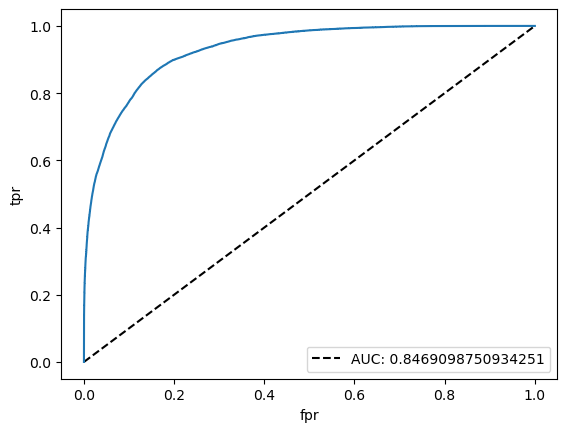

{'Accuracy': 0.8659907089476874,
 'Recall': 0.8138291779618954,
 'Precision': 0.6454005934718101,
 'F1 score': 0.7198946248543492,
 'AUC': 0.8469098750934251}

In [140]:
classification_eva(y_train, pred_train, probs=prob_train_1)

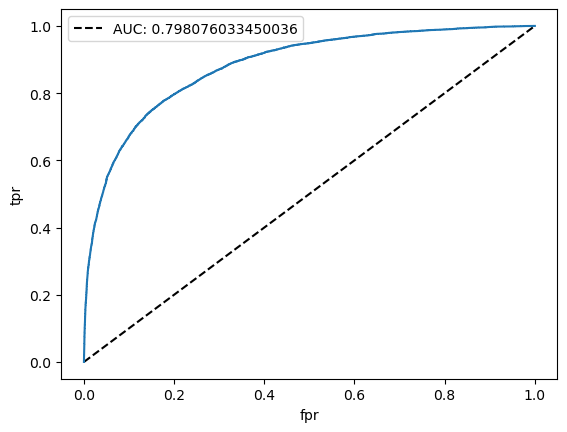

{'Accuracy': 0.8350905257034829,
 'Recall': 0.733906071019473,
 'Precision': 0.5884459955914768,
 'F1 score': 0.6531756550107044,
 'AUC': 0.798076033450036}

In [141]:
classification_eva(y_test, pred_test, probs=prob_test_1)


## Gradient Boosting

In [63]:
gb = GradientBoostingClassifier()

gb.fit(x_train_ns,y_train_ns)

GradientBoostingClassifier()

In [64]:
print('train accuracy: ',gb.score(x_train,y_train))
print('test accuracy: ',gb.score(x_test,y_test))


train accuracy:  0.8388365986669359
test accuracy:  0.838580673307642


In [65]:
pred_train = gb.predict(x_train)
pred_test = gb.predict(x_test)

In [66]:
print('classification report on train data \n',metrics.classification_report(y_train,pred_train))

classification report on train data 
               precision    recall  f1-score   support

           0       0.92      0.87      0.89     97584
           1       0.60      0.73      0.66     26191

    accuracy                           0.84    123775
   macro avg       0.76      0.80      0.78    123775
weighted avg       0.85      0.84      0.84    123775



In [67]:
print('classification report on test data \n',metrics.classification_report(y_test,pred_test))

classification report on test data 
               precision    recall  f1-score   support

           0       0.92      0.87      0.89     32529
           1       0.60      0.72      0.65      8730

    accuracy                           0.84     41259
   macro avg       0.76      0.80      0.77     41259
weighted avg       0.85      0.84      0.84     41259



In [68]:
prob_train_1=gb.predict_proba(x_train)[:,1]  #Prob of 1 
prob_test_1=gb.predict_proba(x_test)[:,1]

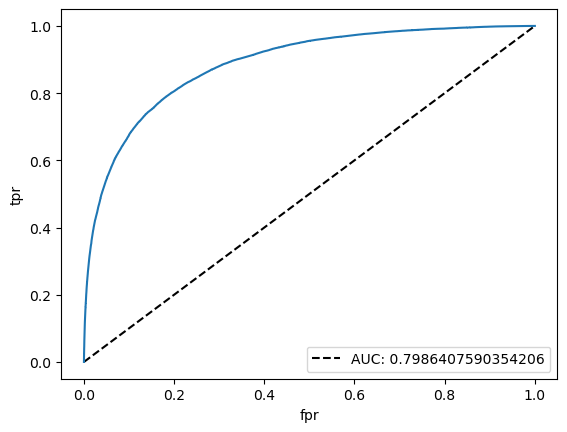

{'Accuracy': 0.8388365986669359,
 'Recall': 0.7289526936733992,
 'Precision': 0.5977270592655208,
 'F1 score': 0.6568499277506366,
 'AUC': 0.7986407590354206}

In [69]:
classification_eva(y_train, pred_train, probs=prob_train_1)

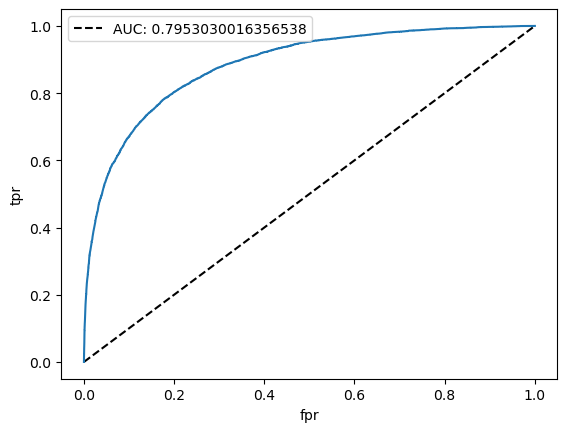

{'Accuracy': 0.838580673307642,
 'Recall': 0.7202749140893471,
 'Precision': 0.5985151342090235,
 'F1 score': 0.6537741734248285,
 'AUC': 0.7953030016356538}

In [70]:
classification_eva(y_test, pred_test, probs=prob_test_1)


In [75]:
## hyperparameter tuning
params = {
    'max_depth': [3,5,10,12,15],
    'min_samples_leaf': [2,5,10,20,50],
    'n_estimators': [15,20,30,40,50,60],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5]
}

In [76]:
rs_gb = RandomizedSearchCV(GradientBoostingClassifier(random_state=0),param_distributions=params,cv=5,n_jobs=4)
rs_gb.fit(x_train_ns,y_train_ns)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
                   n_jobs=4,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'max_depth': [3, 5, 10, 12, 15],
                                        'min_samples_leaf': [2, 5, 10, 20, 50],
                                        'n_estimators': [15, 20, 30, 40, 50,
                                                         60]})

In [77]:
rs_gb.best_estimator_

GradientBoostingClassifier(learning_rate=0.2, max_depth=10, min_samples_leaf=50,
                           n_estimators=60, random_state=0)

In [78]:
print('train accuracy: ',rs_gb.score(x_train,y_train))
print('test accuracy: ',rs_gb.score(x_test,y_test))


train accuracy:  0.881316905675621
test accuracy:  0.8625512009500957


In [79]:
pred_train = rs_gb.predict(x_train)
pred_test = rs_gb.predict(x_test)

In [80]:
print('classification report on train data \n',metrics.classification_report(y_train,pred_train))

classification report on train data 
               precision    recall  f1-score   support

           0       0.91      0.94      0.93     97584
           1       0.75      0.66      0.70     26191

    accuracy                           0.88    123775
   macro avg       0.83      0.80      0.81    123775
weighted avg       0.88      0.88      0.88    123775



In [81]:
print('classification report on test data \n',metrics.classification_report(y_test,pred_test))

classification report on test data 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91     32529
           1       0.70      0.61      0.65      8730

    accuracy                           0.86     41259
   macro avg       0.80      0.77      0.78     41259
weighted avg       0.86      0.86      0.86     41259



In [82]:
prob_train_1=rs_gb.predict_proba(x_train)[:,1]  #Prob of 1 
prob_test_1=rs_gb.predict_proba(x_test)[:,1]

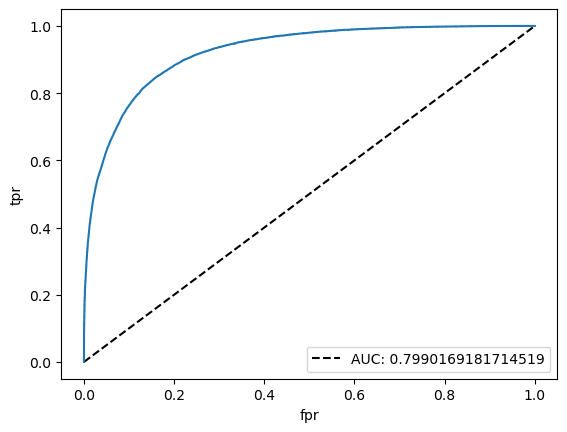

{'Accuracy': 0.881316905675621,
 'Recall': 0.6563323278988966,
 'Precision': 0.7513440272739194,
 'F1 score': 0.7006317505604239,
 'AUC': 0.7990169181714519}

In [83]:
classification_eva(y_train, pred_train, probs=prob_train_1)

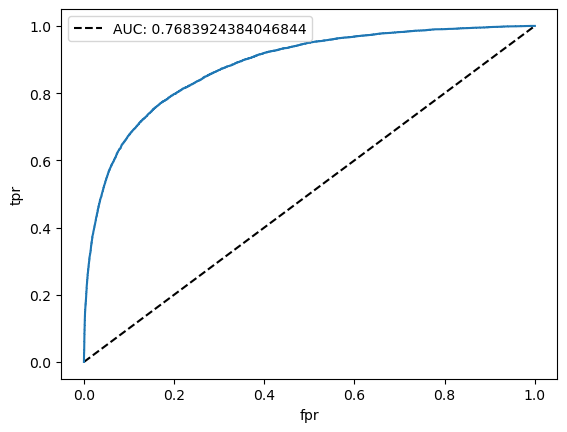

{'Accuracy': 0.8625512009500957,
 'Recall': 0.6051546391752577,
 'Precision': 0.7037431730384974,
 'F1 score': 0.6507359733940999,
 'AUC': 0.7683924384046844}

In [84]:
classification_eva(y_test, pred_test, probs=prob_test_1)


## AdaBoost

In [85]:
ab = AdaBoostClassifier()

ab.fit(x_train_ns,y_train_ns)

AdaBoostClassifier()

In [86]:
print('train accuracy: ',ab.score(x_train,y_train))
print('test accuracy: ',ab.score(x_test,y_test))


train accuracy:  0.8158513431629973
test accuracy:  0.815506919702368


In [87]:
pred_train = ab.predict(x_train)
pred_test = ab.predict(x_test)

In [88]:
print('classification report on train data \n',metrics.classification_report(y_train,pred_train))

classification report on train data 
               precision    recall  f1-score   support

           0       0.93      0.83      0.88     97584
           1       0.55      0.75      0.63     26191

    accuracy                           0.82    123775
   macro avg       0.74      0.79      0.76    123775
weighted avg       0.85      0.82      0.83    123775



In [89]:
print('classification report on test data \n',metrics.classification_report(y_test,pred_test))

classification report on test data 
               precision    recall  f1-score   support

           0       0.92      0.83      0.88     32529
           1       0.55      0.74      0.63      8730

    accuracy                           0.82     41259
   macro avg       0.74      0.79      0.75     41259
weighted avg       0.84      0.82      0.82     41259



In [90]:
prob_train_1=ab.predict_proba(x_train)[:,1]  #Prob of 1 
prob_test_1=ab.predict_proba(x_test)[:,1]

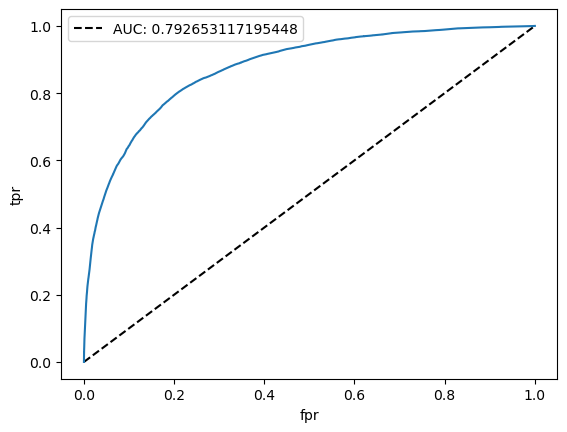

{'Accuracy': 0.8158513431629973,
 'Recall': 0.7524340422282464,
 'Precision': 0.5471734784540204,
 'F1 score': 0.6335942900316685,
 'AUC': 0.792653117195448}

In [91]:
classification_eva(y_train, pred_train, probs=prob_train_1)

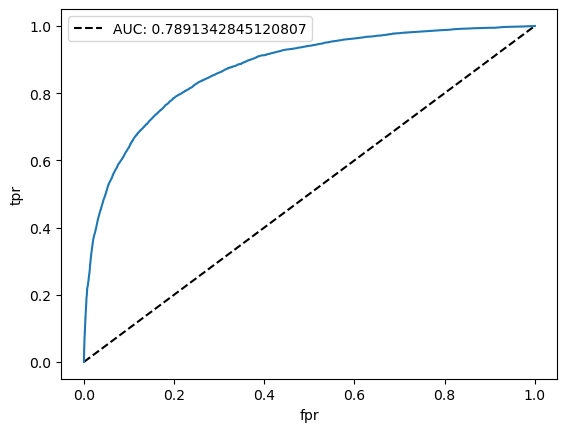

{'Accuracy': 0.815506919702368,
 'Recall': 0.7434135166093929,
 'Precision': 0.5471252739841511,
 'F1 score': 0.6303418803418803,
 'AUC': 0.7891342845120807}

In [92]:
classification_eva(y_test, pred_test, probs=prob_test_1)


## XGBoost

In [93]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            eval_metric="logloss", ## this avoids a warning...
                            seed=0,
                            use_label_encoder=False)
clf_xgb.fit(x_train_ns, y_train_ns)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [94]:
print('train accuracy: ',clf_xgb.score(x_train,y_train))
print('test accuracy: ',clf_xgb.score(x_test,y_test))


train accuracy:  0.8724782872147041
test accuracy:  0.8608303642841562


In [95]:
pred_train = clf_xgb.predict(x_train)
pred_test = clf_xgb.predict(x_test)

In [96]:
print('classification report on train data \n',metrics.classification_report(y_train,pred_train))

classification report on train data 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     97584
           1       0.72      0.65      0.68     26191

    accuracy                           0.87    123775
   macro avg       0.81      0.79      0.80    123775
weighted avg       0.87      0.87      0.87    123775



In [97]:
print('classification report on test data \n',metrics.classification_report(y_test,pred_test))

classification report on test data 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91     32529
           1       0.69      0.62      0.65      8730

    accuracy                           0.86     41259
   macro avg       0.80      0.77      0.78     41259
weighted avg       0.86      0.86      0.86     41259



In [100]:
pred_train = clf_xgb.predict(x_train)
pred_test = clf_xgb.predict(x_test)

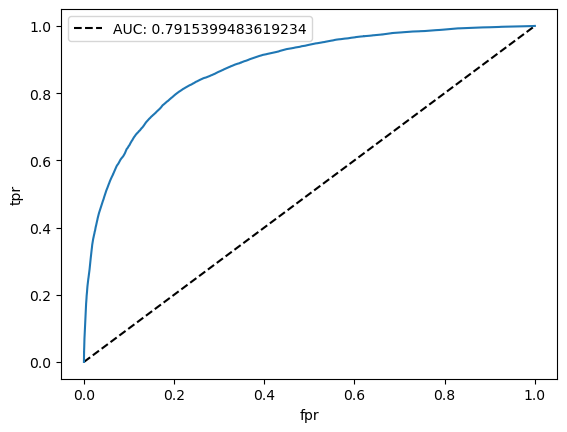

{'Accuracy': 0.8724782872147041,
 'Recall': 0.6512160665877591,
 'Precision': 0.7195106517612319,
 'F1 score': 0.6836620169953503,
 'AUC': 0.7915399483619234}

In [101]:
classification_eva(y_train, pred_train, probs=prob_train_1)

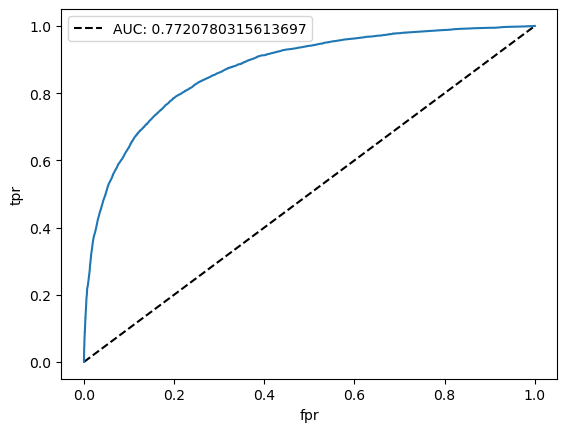

{'Accuracy': 0.8608303642841562,
 'Recall': 0.618213058419244,
 'Precision': 0.691391237509608,
 'F1 score': 0.6527576197387519,
 'AUC': 0.7720780315613697}

In [102]:
classification_eva(y_test, pred_test, probs=prob_test_1)


In [103]:
param_grid = {'max_depth': [3, 4, 5],'learning_rate': [0.1, 0.01, 0.05],
              'gamma': [0, 0.25, 1.0],'reg_lambda': [0, 1.0, 10.0],
              'scale_pos_weight': [1, 3, 5]}
#n_estimators; default is 100 (no. of boosting rounds), subsample, colsample_bytree, alpha

optimal_params = RandomizedSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',seed=0,
                                                          subsample=0.9,colsample_bytree=0.5,early_stopping_rounds=10, eval_metric='auc',
                                                          use_label_encoder=False),param_distributions=param_grid,
                              scoring='roc_auc', verbose=0,cv = 3)#multi:softmax in multiclass problems

optimal_params.fit(x_train_ns,y_train_ns,eval_set=[(x_test, y_test)])

[0]	validation_0-auc:0.77105
[1]	validation_0-auc:0.83676
[2]	validation_0-auc:0.84630
[3]	validation_0-auc:0.84472
[4]	validation_0-auc:0.84328
[5]	validation_0-auc:0.84714
[6]	validation_0-auc:0.84830
[7]	validation_0-auc:0.84887
[8]	validation_0-auc:0.85026
[9]	validation_0-auc:0.85620
[10]	validation_0-auc:0.85801
[11]	validation_0-auc:0.85677
[12]	validation_0-auc:0.85737
[13]	validation_0-auc:0.85619
[14]	validation_0-auc:0.85547
[15]	validation_0-auc:0.85530
[16]	validation_0-auc:0.85665
[17]	validation_0-auc:0.85666
[18]	validation_0-auc:0.85531
[19]	validation_0-auc:0.85517
[0]	validation_0-auc:0.78442
[1]	validation_0-auc:0.84969
[2]	validation_0-auc:0.85439
[3]	validation_0-auc:0.85846
[4]	validation_0-auc:0.85644
[5]	validation_0-auc:0.86004
[6]	validation_0-auc:0.86160
[7]	validation_0-auc:0.86060
[8]	validation_0-auc:0.86121
[9]	validation_0-auc:0.86390
[10]	validation_0-auc:0.86414
[11]	validation_0-auc:0.86529
[12]	validation_0-auc:0.86617
[13]	validation_0-auc:0.86595


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.5, device=None,
                                           early_stopping_rounds=10,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=N...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'gamma': [0, 0.25, 1.0],
                                        'learning_rate': [0.1, 0.01, 0.05],
                                        'max_depth': [3, 4, 5],
                                        'reg_lambda': [0, 1.0, 10.0],
                                        'scale_pos_weight': [1, 3, 5]},
                   scoring='roc_auc')

In [104]:
optimal_params.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=1.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [105]:
print('train accuracy: ',optimal_params.score(x_train,y_train))
print('test accuracy: ',optimal_params.score(x_test,y_test))


train accuracy:  0.8890809793639569
test accuracy:  0.8834740483749156


In [106]:
pred_train = optimal_params.predict(x_train)
pred_test = optimal_params.predict(x_test)

In [107]:
print('classification report on train data \n',metrics.classification_report(y_train,pred_train))

classification report on train data 
               precision    recall  f1-score   support

           0       0.97      0.58      0.72     97584
           1       0.37      0.93      0.53     26191

    accuracy                           0.65    123775
   macro avg       0.67      0.76      0.63    123775
weighted avg       0.84      0.65      0.68    123775



In [108]:
print('classification report on test data \n',metrics.classification_report(y_test,pred_test))

classification report on test data 
               precision    recall  f1-score   support

           0       0.97      0.58      0.72     32529
           1       0.37      0.93      0.53      8730

    accuracy                           0.65     41259
   macro avg       0.67      0.75      0.63     41259
weighted avg       0.84      0.65      0.68     41259



In [109]:
prob_train_1=optimal_params.predict_proba(x_train)[:,1]  #Prob of 1 
prob_test_1=optimal_params.predict_proba(x_test)[:,1]

In [110]:
def classification_eva(act, pred, probs):
    ac1=metrics.accuracy_score(act, pred)
    rc1=metrics.recall_score(act, pred)
    pc1=metrics.precision_score(act, pred)
    f1=metrics.f1_score(act, pred)
    auc1=metrics.roc_auc_score(act, pred)
    result={"Accuracy":ac1, "Recall":rc1, "Precision":pc1, "F1 score":f1, "AUC":auc1}
    fpr, tpr, threshold=metrics.roc_curve(act,probs )
    plt.plot([0,1],[0,1],'k--', label="AUC: "+str(auc1))
    plt.plot(fpr,tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.legend()
    plt.show()
    return result

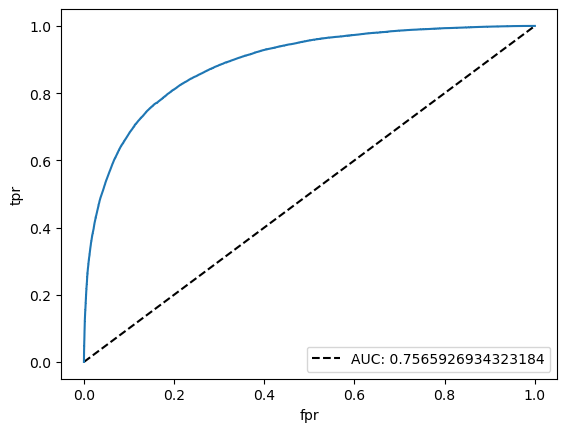

{'Accuracy': 0.653766915774591,
 'Recall': 0.9348631209193998,
 'Precision': 0.3730536002681537,
 'F1 score': 0.5332970323985843,
 'AUC': 0.7565926934323184}

In [111]:
classification_eva(y_train, pred_train, probs=prob_train_1)

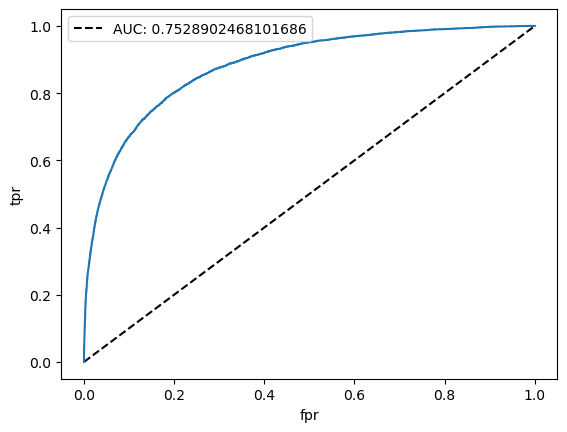

{'Accuracy': 0.6512518480816307,
 'Recall': 0.9290950744558992,
 'Precision': 0.3706868973081669,
 'F1 score': 0.5299402175688478,
 'AUC': 0.7528902468101686}

In [112]:
classification_eva(y_test, pred_test, probs=prob_test_1)

## Final Model

In [145]:
y.value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [146]:
parameters={"criterion":['gini', 'entropy'],
           "max_depth":[9,11,13,15,17],
           "min_samples_split":[8,10,15,20,22,25],
           "min_samples_leaf":[2,5,8,10,12,15],
           "n_estimators":[25,50,100,150,200],
           "bootstrap":[True],
           "max_features":["sqrt","log2"],
           "max_samples":[.5,.6,.75,.8,.9]}

In [147]:
model = RandomizedSearchCV(RandomForestClassifier(),param_distributions=parameters,cv=5,n_jobs=-1)

In [148]:
model.fit(x,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [9, 11, 13, 15, 17],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_samples': [0.5, 0.6, 0.75, 0.8,
                                                        0.9],
                                        'min_samples_leaf': [1, 2, 5, 8, 10],
                                        'min_samples_split': [2, 5, 8, 10, 15,
                                                              20],
                                        'n_estimators': [50, 100, 150, 200,
                                                         300]})

In [149]:
model.best_estimator_

RandomForestClassifier(max_depth=13, max_features='log2', max_samples=0.9,
                       min_samples_leaf=10, min_samples_split=20,
                       n_estimators=50)

In [150]:
model.score(x,y)

0.8742562138710811

In [153]:
prob_train_1=model.predict_proba(x)[:,1]  #Prob of 1 
pred_train = model.predict(x)


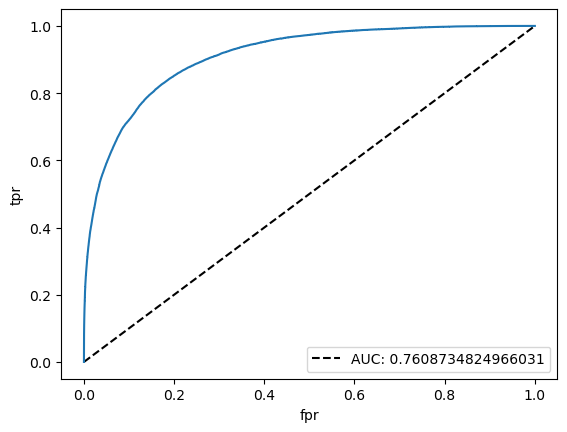

{'Accuracy': 0.8742562138710811,
 'Recall': 0.5643022822943214,
 'Precision': 0.7806520619577705,
 'F1 score': 0.6550761252576291,
 'AUC': 0.7608734824966031}

In [154]:
classification_eva(y, pred_train, probs=prob_train_1)


In [164]:
test = pd.read_csv('test.csv')
test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [165]:
test1 = test.drop(columns=['id','CustomerId','Surname'])

In [166]:
test1[columns_to_scale] = sc.fit_transform(test1[columns_to_scale])

In [167]:
test1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.878176,France,Female,-1.706504,-1.067887,-0.881274,2,0.0,1.0,0.967874
1,0.329567,France,Female,0.888990,-1.067887,-0.881274,1,1.0,0.0,-0.790939
2,-0.006609,France,Female,-0.465181,0.713922,-0.881274,2,1.0,0.0,0.528413
3,0.304665,France,Male,-0.239486,1.070284,-0.881274,1,1.0,0.0,0.032150
4,1.188684,Germany,Male,-0.013791,1.783008,1.050038,1,1.0,0.0,0.539331


In [168]:
test1 = pd.get_dummies(test1,columns=columns_to_encode,dtype='int')

In [169]:
test1.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,-0.878176,-1.706504,-1.067887,-0.881274,0.0,1.0,0.967874,1,0,0,1,0,0,1,0,0
1,0.329567,0.888990,-1.067887,-0.881274,1.0,0.0,-0.790939,1,0,0,1,0,1,0,0,0
2,-0.006609,-0.465181,0.713922,-0.881274,1.0,0.0,0.528413,1,0,0,1,0,0,1,0,0
3,0.304665,-0.239486,1.070284,-0.881274,1.0,0.0,0.032150,1,0,0,0,1,1,0,0,0
4,1.188684,-0.013791,1.783008,1.050038,1.0,0.0,0.539331,0,1,0,0,1,1,0,0,0


In [177]:
Exited = model.predict_proba(test1)[:,1]
Exited

array([0.02196327, 0.86106027, 0.02739019, ..., 0.01794941, 0.18207887,
       0.17564256])

In [178]:
Exited = pd.Series(Exited)

In [182]:
submission = pd.concat([test['id'],Exited],axis=1).rename(columns={0:'Exited'})
submission

,id,Exited
0,165034,0.021963
1,165035,0.861060
2,165036,0.027390
3,165037,0.208992
4,165038,0.349015
...,...,...
110018,275052,0.043488
110019,275053,0.090951
110020,275054,0.017949
110021,275055,0.182079


In [183]:
submission.to_csv("submission.csv",index=False)

## Prediction using Logistic Regression

In [186]:
lr = LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [187]:
lr.score(x,y)

0.8566780178629858

In [188]:
Exited = lr.predict_proba(test1)[:,1]
Exited

array([0.01142145, 0.67790212, 0.07569114, ..., 0.02852713, 0.14639738,
       0.34685104])

In [189]:
Exited = pd.Series(Exited)


In [190]:
submission1 = pd.concat([test['id'],Exited],axis=1).rename(columns={0:'Exited'})
submission1

,id,Exited
0,165034,0.011421
1,165035,0.677902
2,165036,0.075691
3,165037,0.289571
4,165038,0.464964
...,...,...
110018,275052,0.036824
110019,275053,0.085908
110020,275054,0.028527
110021,275055,0.146397


In [191]:
submission1.to_csv("submission1.csv",index=False)


## Prediction using XGBoost

In [201]:
param_grid = {'max_depth': [3, 4, 5,7,10],'learning_rate': [0.1, 0.01, 0.05,0.2,0.25,0.3],
              'gamma': [0, 0.25,0.35,0.5,0.75, 1.0],'reg_lambda': [0, 1.0, 10.0],
              'scale_pos_weight': [1, 3, 5,7]}
#n_estimators; default is 100 (no. of boosting rounds), subsample, colsample_bytree, alpha

xg = RandomizedSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',seed=0,
                                                          subsample=0.9,colsample_bytree=0.5, eval_metric='auc',
                                                          use_label_encoder=False),param_distributions=param_grid,
                              scoring='roc_auc', verbose=0,cv = 3)#multi:softmax in multiclass problems

xg.fit(x,y)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.5, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'gamma': [0, 0.25, 0.35, 0.5, 0.75,
                                                  1.0],
                                        'learning_rate': [0.1, 0.01, 0.05, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 7, 10],
                                        'reg_lambda': [0, 1.0, 10.0],
                                        'scale_pos_weight': [1, 3, 5, 7]},
                   scoring='roc_auc')

In [202]:
xg.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [203]:
xg.score(x,y)

0.8977821486307349

In [204]:
Exited = xg.predict_proba(test1)[:,1]
Exited

array([0.07555391, 0.92445016, 0.07108044, ..., 0.06432127, 0.33455974,
       0.3505608 ], dtype=float32)

In [205]:
Exited = pd.Series(Exited)


In [206]:
submission3 = pd.concat([test['id'],Exited],axis=1).rename(columns={0:'Exited'})
submission3

,id,Exited
0,165034,0.075554
1,165035,0.924450
2,165036,0.071080
3,165037,0.453574
4,165038,0.572052
...,...,...
110018,275052,0.100035
110019,275053,0.269862
110020,275054,0.064321
110021,275055,0.334560


In [199]:
#submission2.to_csv("submission2.csv",index=False)


In [207]:
submission3.to_csv("submission3.csv",index=False)
